In [2]:
pip install wordcloud matplotlib seaborn


     |████████████████████████████████| 513 kB 14 kB/s eta 0:00:014
Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [2]:
# Load training data
train_data = pd.read_csv('../data/processed/train.csv')
test_data = pd.read_csv('../data/processed/test.csv')

# Display the first few rows of the training data
train_data.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,hate_speech_count,offensive_language_count,neither_count,cleaned_text
0,NaN,3,NaN,NaN,NaN,2,RT @UFlorida: @GatorZoneFB It's a bird...It's ...,0.0,0.0,3.0,rt uflorida gatorzonefb birdits planeits jake ...
1,NaN,3,NaN,NaN,NaN,1,Alotta people say they loyal to they niggas an...,1.0,2.0,0.0,alotta people say loyal nigga bitch yall aint ...
2,NaN,3,NaN,NaN,NaN,1,RT @phishlicia: Ocho is approaching bitches,0.0,3.0,0.0,rt phishlicia ocho approaching bitch
3,NaN,6,NaN,NaN,NaN,1,RT @_LoveAblePinky: &#8220;@1000gramsBee: i ha...,0.0,6.0,0.0,rt loveablepinky gramsbee hate ah dirty house ...
4,20884.0,3,0.0,0.0,3.0,2,RT @zachthorpe78: where are all the thinkpiece...,NaN,NaN,NaN,rt zachthorpe thinkpieces kid call trash garba...


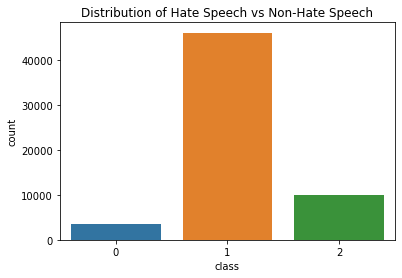

In [3]:
# Code for plotting the distribution of the target variable
sns.countplot(x='class', data=train_data)
plt.title('Distribution of Hate Speech vs Non-Hate Speech')
plt.show()


In [4]:
# Basic statistics
train_data.info()
train_data.describe()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59479 entries, 0 to 59478
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                39593 non-null  float64
 1   count                     59479 non-null  int64  
 2   hate_speech               39593 non-null  float64
 3   offensive_language        39593 non-null  float64
 4   neither                   39593 non-null  float64
 5   class                     59479 non-null  int64  
 6   tweet                     59479 non-null  object 
 7   hate_speech_count         19886 non-null  float64
 8   offensive_language_count  19886 non-null  float64
 9   neither_count             19886 non-null  float64
 10  cleaned_text              59479 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 5.0+ MB


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,hate_speech_count,offensive_language_count,neither_count
count,39593.000000,59479.000000,39593.000000,39593.000000,39593.000000,59479.000000,19886.000000,19886.000000,19886.000000
mean,12684.669108,3.247734,0.279746,2.417675,0.548355,1.109686,0.282762,2.423916,0.544956
std,7289.980556,0.893527,0.630069,1.401295,1.111755,0.461111,0.632656,1.407448,1.111019
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6373.000000,3.000000,0.000000,2.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,12727.000000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,3.000000,0.000000
75%,18981.000000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,3.000000,0.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000,7.000000,9.000000,9.000000


In [5]:
# Dropping columns with significant missing values
train_data.drop(columns=['Unnamed: 0', 'hate_speech', 'offensive_language', 'neither', 'hate_speech_count', 'offensive_language_count', 'neither_count'], inplace=True)

# Verify the resulting dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59479 entries, 0 to 59478
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   count         59479 non-null  int64 
 1   class         59479 non-null  int64 
 2   tweet         59479 non-null  object
 3   cleaned_text  59479 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.8+ MB


In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(data, title=None):
    # You need to specify the path to a TrueType font file here
    font_path = '/usr/share/fonts/truetype/noto/NotoSansTifinaghRhissaIxa-Regular.ttf'  # Update this path

    wordcloud = WordCloud(
        font_path=font_path,  # Specify the font path
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

# Word cloud for the entire dataset
plot_wordcloud(train_data['cleaned_text'], title='Word Cloud for Hate Speech Dataset')


ValueError: Only supported for TrueType fonts

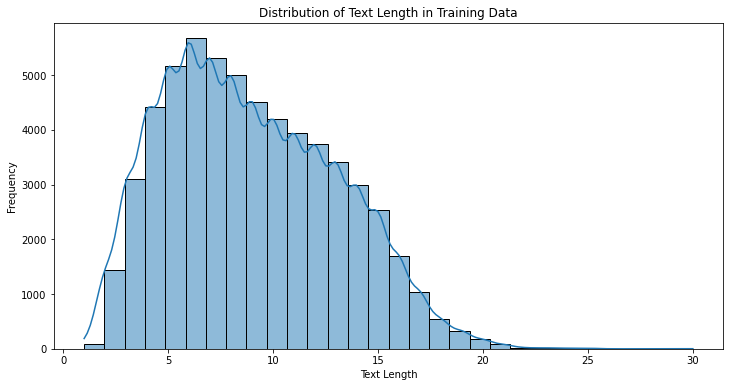

In [9]:
train_data['text_length'] = train_data['cleaned_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
sns.histplot(train_data['text_length'], kde=True, bins=30)
plt.title('Distribution of Text Length in Training Data')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


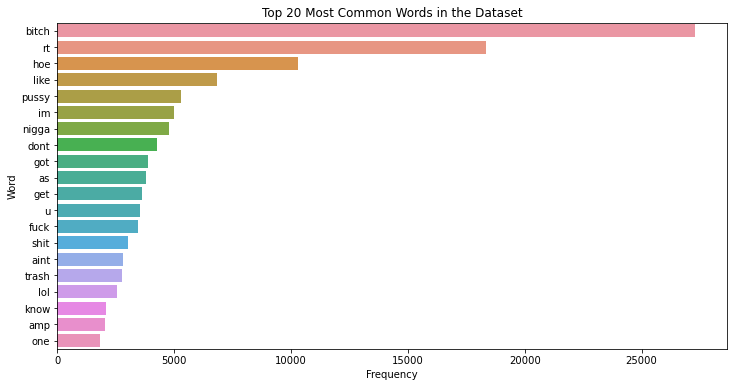

In [6]:
from collections import Counter

def plot_top_n_words(data, n=20):
    words = ' '.join(data).split()
    word_freq = Counter(words)
    common_words = word_freq.most_common(n)
    words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Frequency', y='Word', data=words_df)
    plt.title(f'Top {n} Most Common Words in the Dataset')
    plt.show()

# Plot top 20 most common words
plot_top_n_words(train_data['cleaned_text'])
